In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd # csv I/O

IMG_SIZE = 299
MODEL_NAME = 'xception'

DATA_DIR= r'D:\LICENTA\processed_data\size_{size1}x{size2}'.format(size1=IMG_SIZE, size2=IMG_SIZE)
FEATURES_PATH = DATA_DIR +  r'\train_biz_{name}_features.csv'.format(name=MODEL_NAME)

In [ ]:
train_photos = pd.read_csv('train_photo_to_biz_ids.csv')
train_photo_to_biz = pd.read_csv('train_photo_to_biz_ids.csv', index_col='photo_id')

train_df = pd.read_csv(FEATURES_PATH)

X = train_df['feature_vector'].values
Y = train_df['label'].values

def convert_label_to_array(str_label):
    str_label = str_label[1:-1]
    str_label = str_label.split(',')
    return [int(x) for x in str_label if len(x) > 0]

def convert_feature_to_vector(str_feature):
    str_feature = str_feature[1:-1]
    str_feature = str_feature.split(',')
    return [float(x) for x in str_feature]

Y = np.array([convert_label_to_array(y) for y in train_df['label']])
X = np.array([convert_feature_to_vector(x) for x in train_df['feature_vector']])

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(Y)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

yellow_patch = mpatches.Patch(color='yellow', label='Has the class')
purple_patch = mpatches.Patch(color='purple', label='Does not have the class')

titles = ['Class 0: good_for_lunch',
         'Class 1: good_for_dinner',
         'Class 2: takes_reservations',
         'Class 3: outdoor_seating',
         'Class 4: restaurant_is_expensive',
         'Class 5: has_alcohol',
         'Class 6: has_table_service',
         'Class 7: ambience_is_classy',
         'Class 8: good_for_kids']

for class_index in range(9):
    colors = [int(i%2) for i in Y[:,class_index]]
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(titles[class_index])
    plt.legend(handles=[yellow_patch, purple_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.axis([-20, 20, -15, 15])
    plt.scatter(result[:,0], result[:,1], c=colors)
    plt.show()

In [3]:
pd.read_csv('train.csv')['business_id'][500:530]

500    1845
501    1850
502    1851
503    1853
504    1854
505    1856
506    1862
507     186
508    1864
509    1865
510    1866
511    1869
512     187
513    1873
514    1875
515    1877
516    1880
517    1882
518    1883
519     188
520    1885
521    1889
522    1890
523     189
524    1894
525    1897
526    1898
527    1902
528    1903
529    1904
Name: business_id, dtype: int64

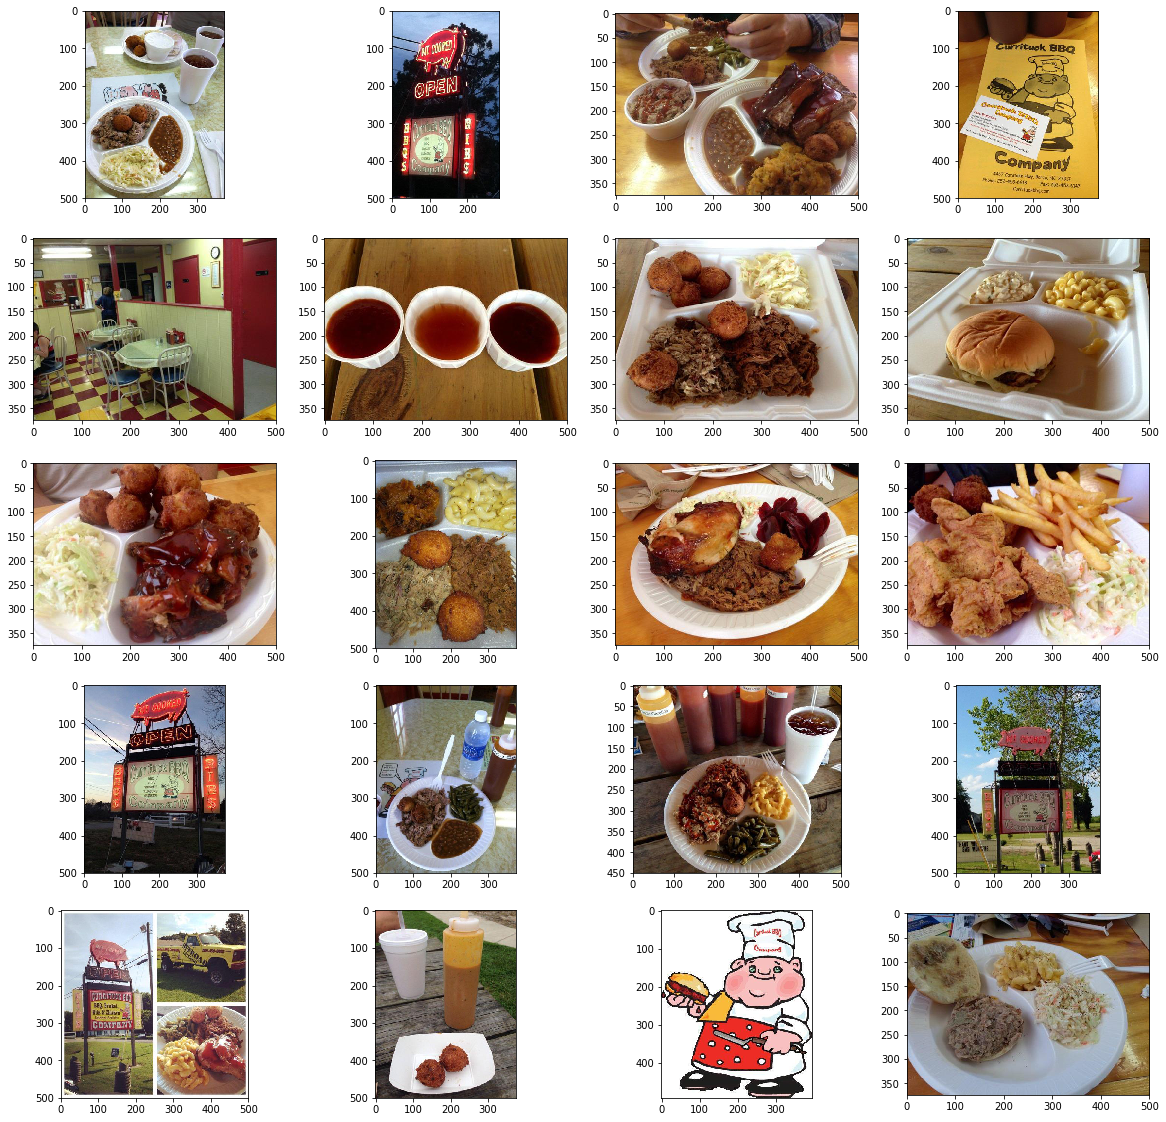

In [105]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

train_photos_to_biz = pd.read_csv('train_photo_to_biz_ids.csv')
train_labels = pd.read_csv('train.csv')

TRAIN_DIR = r'D:\LICENTA\train_photos'

train_images = [os.path.join(TRAIN_DIR, str(x[0]) + '.jpg') 
                for x in train_photos_to_biz.values if x[1] == 1843]

fig = plt.figure(figsize=(20, 20))

columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    if i > len(train_images):
        break
    img = mpimg.imread(train_images[i - 1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)